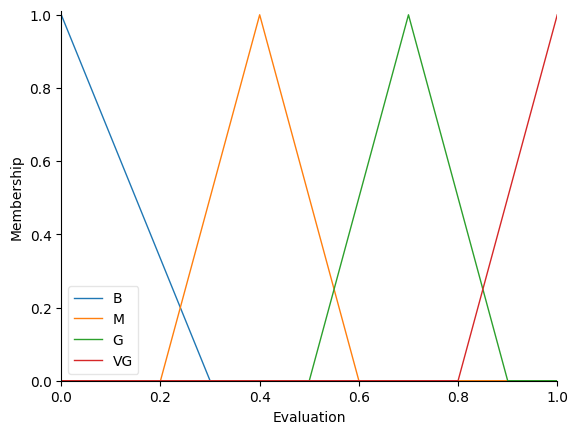

In [ ]:

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl




discover = ctrl.Antecedent(np.arange(0, 3.05, 0.05), 'discover')
Go = ctrl.Antecedent(np.arange(0, 5.05, 0.05), 'Go')
fitting_room = ctrl.Antecedent(np.arange(0, 8.05, 0.05), 'fitting_room')
cashier = ctrl.Antecedent(np.arange(0, 4.05, 0.05), 'cashier')

E = ctrl.Consequent(np.arange(0, 1.05, 0.05), 'Evaluation')


Go['B'] = fuzz.trimf(Go.universe, [0 , 0 , 2])
Go['M'] = fuzz.trimf(Go.universe, [1.5, 2.5 , 3.5])
Go['G'] = fuzz.trimf(Go.universe, [3, 5, 5])



discover['B'] = fuzz.trimf(discover.universe, [0 , 0 , 1.5])
discover['M'] = fuzz.trimf(discover.universe, [1, 1.75 , 2.5])
discover['G'] = fuzz.trimf(discover.universe, [2, 3, 3])


fitting_room['B'] = fuzz.trimf(fitting_room.universe, [0 , 0 , 3])
fitting_room['M'] = fuzz.trimf(fitting_room.universe, [2, 3.5 , 5])
fitting_room['G'] = fuzz.trimf(fitting_room.universe, [4, 8, 8])


cashier['B'] = fuzz.trimf(cashier.universe, [0 , 0 , 2])
cashier['M'] = fuzz.trimf(cashier.universe, [1.5, 2.25 , 3])
cashier['G'] = fuzz.trimf(cashier.universe, [2.5,4 , 4])


E['B'] = fuzz.trimf(E.universe, [0 , 0 , 0.3])
E['M'] = fuzz.trimf(E.universe, [0.2, 0.4 , 0.6])
E['G'] = fuzz.trimf(E.universe, [0.5,0.7 , 0.9])
E['VG'] = fuzz.trimf(E.universe, [0.8,1 , 1])

E.view()


# ****************************
Go.view()
discover.view()
cashier.view()
fitting_room.view()

# Base 1
r1 = ctrl.Rule(Go['B'] & fitting_room['G'] & cashier['B'], E['B'])
r2 = ctrl.Rule(cashier['G'], E['G'])
r3 = ctrl.Rule(Go['B'], E['B'])
r4 = ctrl.Rule(discover['B'], E['B'])
r5 = ctrl.Rule(Go['G'] & fitting_room['G'] & cashier['G'] & discover['G'], E['VG'])


Spare_Management = ctrl.ControlSystem([r1,r2,r3,r4,r5])

SM = ctrl.ControlSystemSimulation(Spare_Management)

# from Admin
SM.input['Go'] = 0 # max 5
SM.input['fitting_room'] = 0 # max 8
SM.input['cashier'] = 0 # max 4
SM.input['discover'] = 0 # max 3

SM.compute()
print(SM.output['Evaluation'])

print("done")


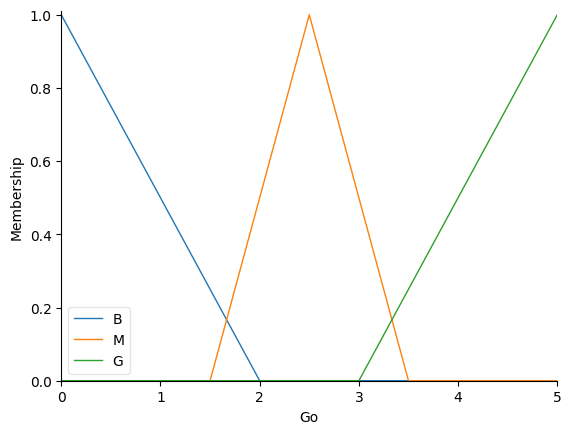

In [24]:
Go.view()

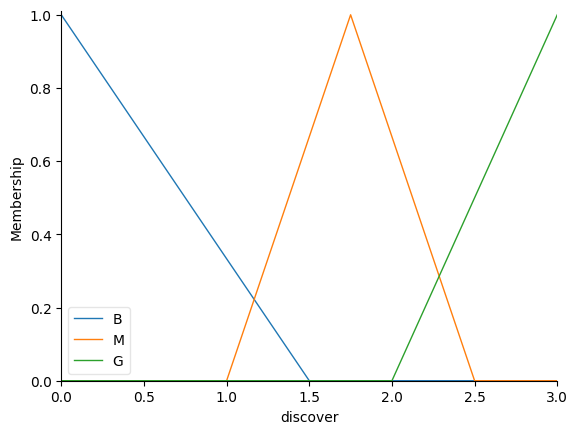

In [25]:
discover.view()


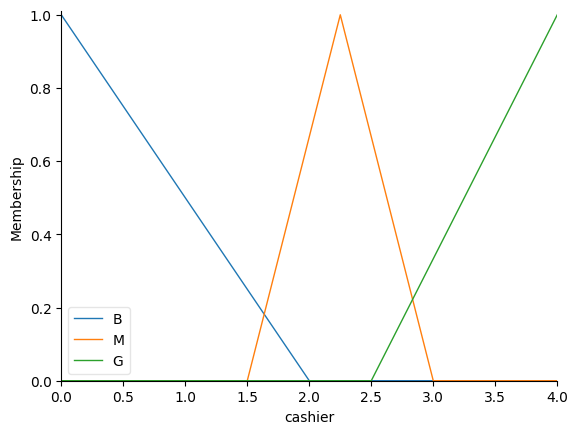

In [26]:
cashier.view()


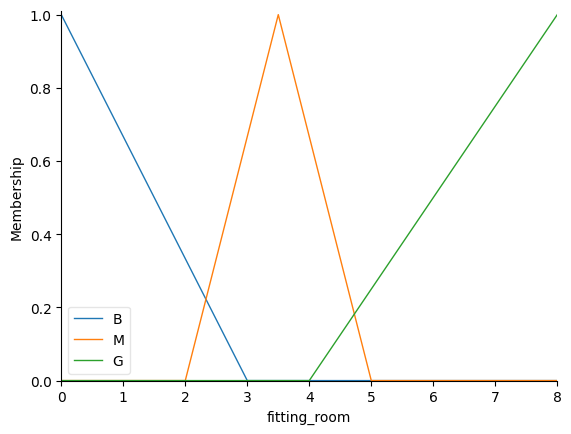

In [27]:
fitting_room.view()


In [ ]:
# Base 1
# r1 = ctrl.Rule(Go['B'] & fitting_room['G'] & cashier['B'], E['B'])
# r2 = ctrl.Rule(cashier['G'], E['G'])
# r3 = ctrl.Rule(Go['B'], E['B'])
# r4 = ctrl.Rule(discover['B'], E['B'])
r5 = ctrl.Rule(Go['G'] & fitting_room['G'] & cashier['G'] & discover['G'], E['VG'])


Spare_Management = ctrl.ControlSystem([r1,r2,r3,r4,r5])

SM = ctrl.ControlSystemSimulation(Spare_Management)

# from Admin
SM.input['Go'] = 0 # max 5
SM.input['fitting_room'] = 0 # max 8
SM.input['cashier'] = 0 # max 4
SM.input['discover'] = 0 # max 3

SM.compute()
print(SM.output['Evaluation'])

0.1


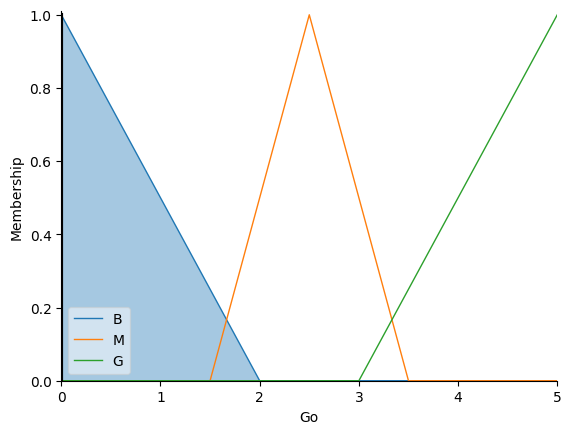

In [29]:
Go.view(sim=SM)


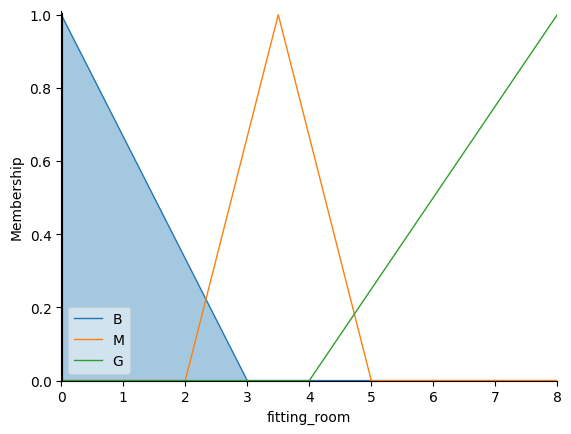

In [30]:
fitting_room.view(sim=SM)



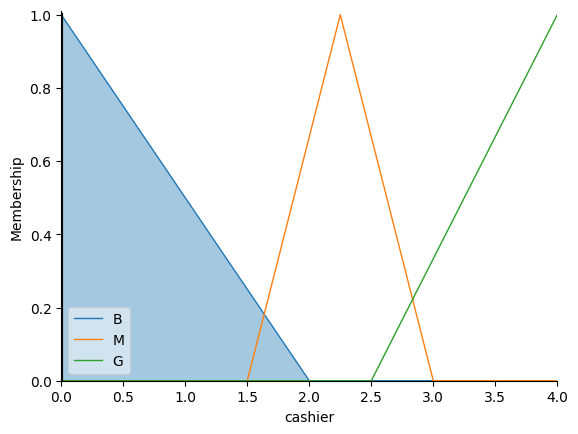

In [31]:
cashier.view(sim=SM)



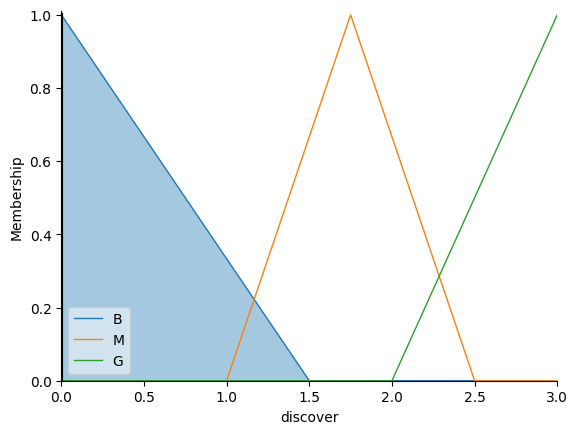

In [32]:
discover.view(sim=SM)



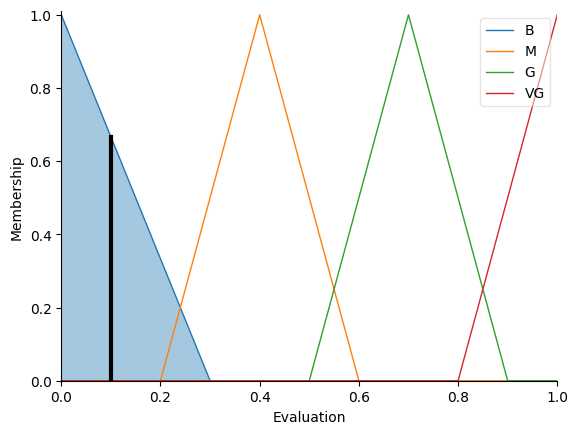

In [33]:
E.view(sim=SM)